In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

In [2]:
pid = pd.read_csv('test.csv')#['PassengerId']
pid = pid.drop(columns = ['Pclass', 'Name', 'Cabin', 'Ticket', 'Fare', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'])
#print(pid)
lgbm_pdb = pd.read_csv('pdb-lgbm.csv')
#print(lgbm_pdb)
xgb_pdb = pd.read_csv('pdb-xgb.csv')
#print(xgb_pdb)
reg_pdb = pd.read_csv('pdb-reg.csv')
#print(reg_pdb)

In [3]:
pdb = pd.DataFrame()
pdb['lgbm'] = lgbm_pdb['lgbm']
pdb['xgb'] = xgb_pdb['xgb']
pdb['reg'] = reg_pdb['reg']
pdb['Suma'] = np.NaN
#print(pdb)

In [4]:
lgbm_pdb = lgbm_pdb.assign(Normal = pd.Series())

for i in range(0, len(lgbm_pdb)):
    lgbm_pdb['Normal'][i] = (lgbm_pdb['lgbm'][i] - lgbm_pdb['lgbm'].min()) / (lgbm_pdb['lgbm'].max() - lgbm_pdb['lgbm'].min())
    
#print(lgbm_pdb)

In [5]:
xgb_pdb = xgb_pdb.assign(Normal = pd.Series())

for i in range(len(xgb_pdb)):
    xgb_pdb['Normal'][i] = (xgb_pdb['xgb'][i] - xgb_pdb['xgb'].min()) / (xgb_pdb['xgb'].max() - xgb_pdb['xgb'].min())
    
#print(xgb_pdb)

In [6]:
#pozmieniac cos bo wartosci przy min moga byc ujemne (?)

#print(reg_pdb['reg'].min())

reg_pdb = reg_pdb.assign(Normal = pd.Series())

for i in range(0, len(reg_pdb)):
    reg_pdb['Normal'][i] = (reg_pdb['reg'][i] - reg_pdb['reg'].min()) / (reg_pdb['reg'].max() - reg_pdb['reg'].min())
    
#print(reg_pdb)

In [7]:
# kek1 = reg_pdb['Normal']
# kek2 = xgb_pdb['Normal']
# kek3 = lgbm_pdb['Normal']

# for i in range(418):
#     if kek1[i] >= 0.5599:
#         kek1[i] = 1
#     else:  
#         kek1[i] = 0
        
# umarlo1 = (1 - sum(kek1) / 418) * 100

# for i in range(418):
#     if kek2[i] >= 0.539:
#         kek2[i] = 1
#     else:  
#         kek2[i] = 0
        
# umarlo2 = (1 - sum(kek2) / 418) * 100

# for i in range(418):
#     if kek3[i] >= 0.474:
#         kek3[i] = 1
#     else:  
#         kek3[i] = 0
        
# umarlo3 = (1 - sum(kek3) / 418) * 100

# print('[Reg] Umarło: ', umarlo1, '% pasażerów.')
# print('[XGB] Umarło: ', umarlo2, '% pasażerów.')
# print('[LGBM] Umarło: ', umarlo3, '% pasażerów.')

In [8]:
#przemiana danych

for i in  range(0, 418):
    if(0 <= lgbm_pdb['Normal'][i] < 0.29):
        lgbm_pdb['Normal'][i] = 0
    elif(0.29 <= lgbm_pdb['Normal'][i] < 0.5):
        lgbm_pdb['Normal'][i] = 0.4
    elif(0.5 <= lgbm_pdb['Normal'][i] < 0.7):
        lgbm_pdb['Normal'][i] = 0.6
    elif(0.7 <= lgbm_pdb['Normal'][i] < 0.9):
        lgbm_pdb['Normal'][i] = 0.8
    elif(0.9 <= lgbm_pdb['Normal'][i] <= 1):
        lgbm_pdb['Normal'][i] = 1
    else:
        lgbm_pdb['Normal'][i] = lgbm_pdb['Normal'][i]
        
# print(lgbm_pdb)
# lgbm_pdb['Normal'].value_counts()

In [9]:
lgbm_pdb['Normal'].value_counts()

0.0    225
0.6     53
1.0     49
0.8     46
0.4     45
Name: Normal, dtype: int64

In [10]:
#przemiana danych

for i in  range(0, 418):
    if(0 <= xgb_pdb['Normal'][i] < 0.18):
        xgb_pdb['Normal'][i] = 0
    elif(0.18 <= xgb_pdb['Normal'][i] < 0.3):
        xgb_pdb['Normal'][i] = 0.2
    elif(0.3 <= xgb_pdb['Normal'][i] < 0.5):
        xgb_pdb['Normal'][i] = 0.4
    elif(0.5 <= xgb_pdb['Normal'][i] < 0.69):
        xgb_pdb['Normal'][i] = 0.6
    elif(0.69 <= xgb_pdb['Normal'][i] < 0.83):
        xgb_pdb['Normal'][i] = 0.8
    elif(0.83 <= xgb_pdb['Normal'][i] <= 1):
        xgb_pdb['Normal'][i] = 1
    else:
        xgb_pdb['Normal'][i] = xgb_pdb['Normal'][i]
        
# print(xgb_pdb)
# xgb_pdb['Normal'].value_counts()

In [11]:
xgb_pdb['Normal'].value_counts()

0.0    182
1.0     83
0.6     51
0.2     45
0.4     31
0.8     26
Name: Normal, dtype: int64

In [12]:
#przemiana danych

for i in  range(0, 418):
    if(0 <= reg_pdb['Normal'][i] < 0.15):
        reg_pdb['Normal'][i] = 0
    elif(0.15 <= reg_pdb['Normal'][i] < 0.225):
        reg_pdb['Normal'][i] = 0.2
    elif(0.225 <= reg_pdb['Normal'][i] < 0.51):
        reg_pdb['Normal'][i] = 0.4
    elif(0.51 <= reg_pdb['Normal'][i] < 0.72):
        reg_pdb['Normal'][i] = 0.6
    elif(0.72 <= reg_pdb['Normal'][i] < 0.9):
        reg_pdb['Normal'][i] = 0.8
    elif(0.9 <= reg_pdb['Normal'][i] <= 1):
        reg_pdb['Normal'][i] = 1
    else:
        reg_pdb['Normal'][i] = reg_pdb['Normal'][i]
        
# print(reg_pdb)
# reg_pdb['Normal'].value_counts()

In [13]:
reg_pdb['Normal'].value_counts()

0.4    238
0.6     99
0.8     69
0.2      4
0.0      4
1.0      4
Name: Normal, dtype: int64

In [14]:
def oblicz_avg(pid, lgbm, xgb, reg):
    values = [lgbm, xgb, reg]
    weights = [90, 91, 44]
    
    s = 0
    for x, y in zip(values, weights):
        s += x * y
        
    pid = s / sum(weights)
    return pid

In [10]:
pid = pid.assign(Survived = pd.Series())
#print(pid)

# for i in range(0, 418):
#     if(lgbm_pdb['Normal'][i] >= 0.8 and xgb_pdb['Normal'][i] >= 0.8):
#         pid['Survived'][i] = 1
        
#     elif(lgbm_pdb['Normal'][i] <= 0.2 and xgb_pdb['Normal'][i] <= 0.2):
#         pid['Survived'][i] = 0

#     elif((xgb_pdb['Normal'][i] <= 0.4 and reg_pdb['Normal'][i] <= 0.4) or (lgbm_pdb['Normal'][i] <= 0.4 and reg_pdb['Normal'][i] <= 0.4)):
#         pid['Survived'][i] = 0

#     elif((xgb_pdb['Normal'][i] >= 0.6 and reg_pdb['Normal'][i] >= 0.6) or (lgbm_pdb['Normal'][i] >= 0.6 and reg_pdb['Normal'][i] >= 0.6)):
#         pid['Survived'][i] = 1

#     else:
#         pid['Survived'][i] = oblicz_avg(pid['Survived'][i], lgbm_pdb['Normal'][i], xgb_pdb['Normal'][i], reg_pdb['Normal'][i])
#         print(pid['Survived'][i])
        
#         if(pid['Survived'][i] >= 0.5):
#             pid['Survived'][i] = 1
#         if(pid['Survived'][i] < 0.5):
#             pid['Survived'][i] = 0

print(pid)

     PassengerId  Survived
0            892       NaN
1            893       NaN
2            894       NaN
3            895       NaN
4            896       NaN
5            897       NaN
6            898       NaN
7            899       NaN
8            900       NaN
9            901       NaN
10           902       NaN
11           903       NaN
12           904       NaN
13           905       NaN
14           906       NaN
15           907       NaN
16           908       NaN
17           909       NaN
18           910       NaN
19           911       NaN
20           912       NaN
21           913       NaN
22           914       NaN
23           915       NaN
24           916       NaN
25           917       NaN
26           918       NaN
27           919       NaN
28           920       NaN
29           921       NaN
..           ...       ...
388         1280       NaN
389         1281       NaN
390         1282       NaN
391         1283       NaN
392         1284       NaN
3

In [11]:
pid['Survived'].value_counts() 

Series([], Name: Survived, dtype: int64)

In [17]:
umarloavg = (1 - sum(pid['Survived']) / 418) * 100
    
print('[AVG] Umarło: ', umarloavg, '% pasażerów.')

[AVG] Umarło:  nan % pasażerów.


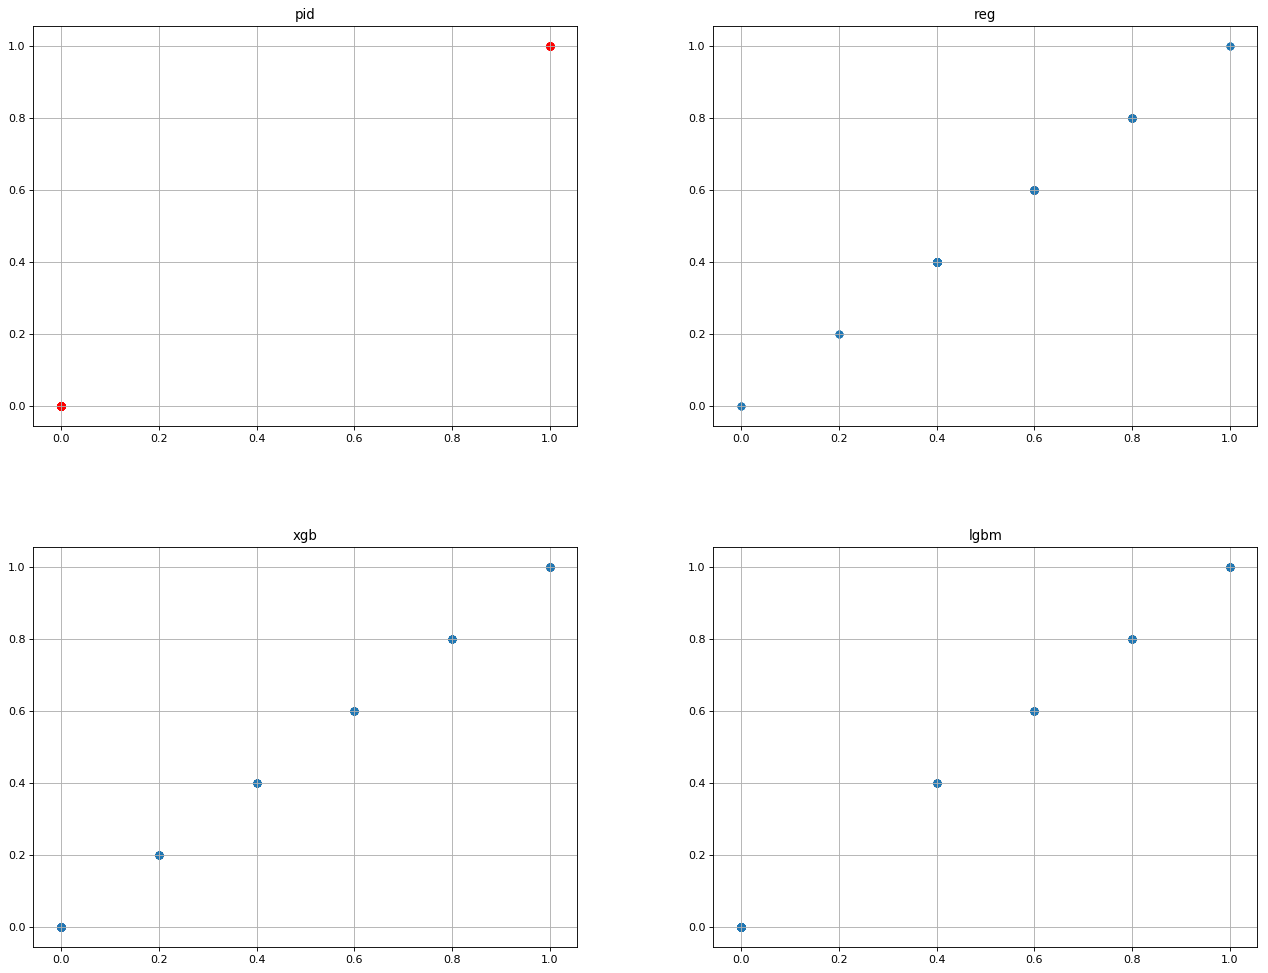

In [18]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221)
plt.title('pid')
pidplt = plt.scatter(pid['Survived'], pid['Survived'], color = 'red')
plt.grid(True)

plt.subplot(222)
plt.title('reg')
regplt = plt.scatter(reg_pdb['Normal'], reg_pdb['Normal'])
plt.grid(True)

# plt.figure(2)
plt.subplot(223)
plt.title('xgb')
xgbplt = plt.scatter(xgb_pdb['Normal'], xgb_pdb['Normal'])
plt.grid(True)

plt.subplot(224)
plt.title('lgbm')
lgbmplt = plt.scatter(lgbm_pdb['Normal'], lgbm_pdb['Normal'])
plt.grid(True)

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top = 0.92, bottom = 0.2, left = 0.10, right = 0.95, hspace = 0.3, wspace = 0.25)

plt.show()

In [19]:
pid['Survived'] = pid['Survived'].astype(int)
pid.to_csv('wynik-avg.csv', index = False)

ValueError: Cannot convert non-finite values (NA or inf) to integer